<a href="https://colab.research.google.com/github/JamesBarciz/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/James_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
#drunk_given_pos = ((pos_given_drunk) * drunk) / pos

In [0]:
import numpy as np
from scipy import stats

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / prob_positive

In [12]:
prob_drunk_given_positive(0.001, 0.08, 1)

0.0125

In [0]:
def drunk_given_pos(drunk_prior, positive, positive_drunk, num_iter):
  posterior_list = []
  for i in range(num_iter):
    if i == 0:
      posterior_list.append(prob_drunk_given_positive(drunk_prior, positive, positive_drunk))
    else:
      posterior_list.append(prob_drunk_given_positive(posterior_list[i-1], positive, positive_drunk))
  return posterior_list

In [14]:
drunk_given_pos(0.001, 0.08, 1, 7)

[0.0125,
 0.15625,
 1.953125,
 24.4140625,
 305.17578125,
 3814.697265625,
 47683.7158203125]

In [15]:
def drunk_given_pos(drunk_prior, positive, positive_drunk, num_iter):
  posterior_list = []
  for i in range(num_iter):
    posterior = (positive_drunk * drunk_prior) / positive
    posterior_list.append(posterior)
    drunk_prior = posterior
  return posterior_list

print(drunk_given_pos(.001, .08, 1, 3))

[0.0125, 0.15625, 1.953125]


In [0]:
stats.bayes_mvs?

In [0]:
import pandas as pd
import random

In [0]:
random_list = []
random_list.append(random.sample(range(1, 100), 10))

In [25]:
random_list

[[42, 80, 68, 64, 33, 45, 4, 29, 19, 26]]

In [0]:
df = pd.DataFrame(random_list)

In [0]:
mean, var, std = stats.bayes_mvs(df)

In [30]:
mean

Mean(statistic=41.0, minmax=(27.225200155813226, 54.774799844186774))

In [31]:
var

Variance(statistic=726.0, minmax=(300.37276003085094, 1528.369183198238))

In [32]:
std

Std_dev(statistic=26.002154241869942, minmax=(17.331265390353092, 39.09436255009459))

In [0]:
column_names = ['Class_Name', 'handicapped-infants', 'water-project-cost-sharing',
'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid',
'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending',
'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'
               ]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_names, na_values='?')

In [0]:
rep_data = df[df['Class_Name']=='republican']
dem_data = df[df['Class_Name']=='democrat']

In [0]:
dem_data = dem_data.drop(columns='Class_Name')
rep_data = rep_data.drop(columns='Class_Name')

In [0]:
dem_data = dem_data.replace(to_replace=['y', 'n'], value=[1, 0])
rep_data = rep_data.replace(to_replace=['y', 'n'], value=[1, 0])

In [42]:
dem_data_hi = dem_data['handicapped-infants'].dropna()
dem_data_hi.describe()

count    258.000000
mean       0.604651
std        0.489876
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: handicapped-infants, dtype: float64

In [0]:
mean, var, std = stats.bayes_mvs(dem_data['handicapped-infants'].dropna(), alpha=0.95)

In [0]:
dem_data_nona = dem_data.dropna()

In [0]:
mean, var, std = stats.bayes_mvs(dem_data_nona, alpha=0.95)

In [43]:
rep_data_hi = rep_data['handicapped-infants'].dropna()
rep_data_hi.describe()

count    165.000000
mean       0.187879
std        0.391804
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: handicapped-infants, dtype: float64

In [0]:
rep_data_hi = stats.bayes_mvs(rep_data['handicapped-infants'].dropna())

In [0]:
import matplotlib.pyplot as plt

In [0]:
import decimal

def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

In [110]:
list(drange(0, 1.05, '0.1'))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

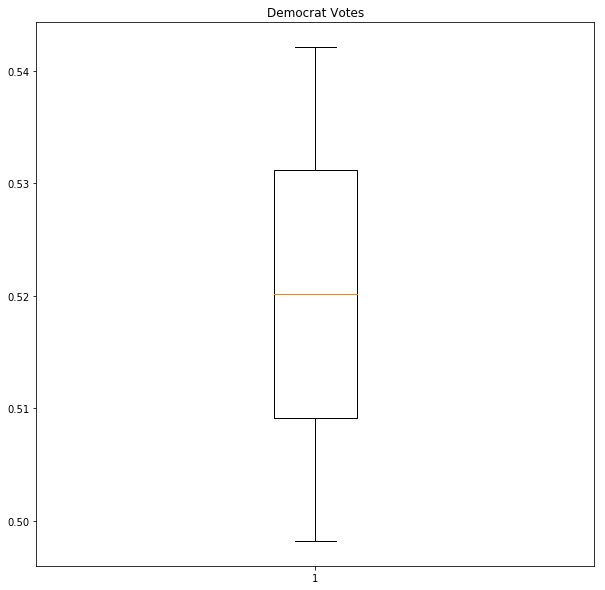

In [106]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.boxplot(mean[1])
plt.title('Democrat Votes');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)